# Vector Playground

The notebook serves as a hands-on learning tool that bridges abstract linear algebra concepts with concrete visual and numerical examples, making basis transformations and coordinate systems intuitive through interactive exploration.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import pandas as pd
import math

# Utilities

In [2]:
def rand_1d_vec(dim=2):
    return 2 * np.random.rand(dim) - 1

def calc_norm(vec):
    return np.sqrt(np.sum(np.square(vec)))

def calc_dot_product(vec1, vec2):
    return np.sum(np.multiply(vec1, vec2))

def calc_angle(vec1, vec2):
    return np.arccos(np.clip((calc_dot_product(vec1, vec2)) / (calc_norm(vec1) * calc_norm(vec2)), -1, 1))

# Generate Vectors

In [3]:
v1_2d = rand_1d_vec(2)
v2_2d = rand_1d_vec(2)
v3_2d = rand_1d_vec(2)

v1_3d = rand_1d_vec(3)
v2_3d = rand_1d_vec(3)
v3_3d = rand_1d_vec(3)

print(f"v1_2d: {v1_2d}")
print(f"v2_2d: {v2_2d}")
print(f"v3_2d: {v3_2d}")
print(f"v1_3d: {v1_3d}")
print(f"v2_3d: {v2_3d}")
print(f"v3_3d: {v3_3d}")


v1_2d: [ 0.15126282 -0.76171808]
v2_2d: [ 0.50587188 -0.84638097]
v3_2d: [-0.63995123  0.47296761]
v1_3d: [-0.81946335 -0.90020089 -0.22793421]
v2_3d: [ 0.20622828  0.03619619 -0.25926069]
v3_3d: [ 0.0706235  -0.0907047  -0.24863228]


# Visualization (2D)

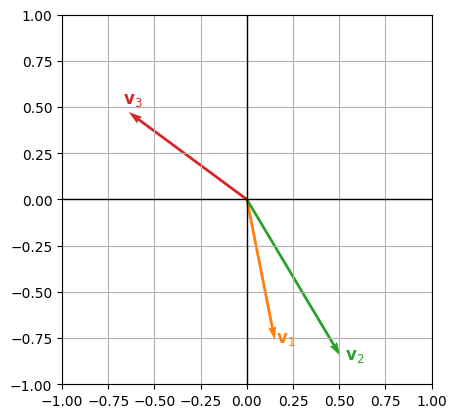

In [4]:
vecs_2d = np.array([v1_2d, v2_2d, v3_2d])

fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.grid(True)
ax.axhline(0, color='black', linewidth=1)  # x-axis
ax.axvline(0, color='black', linewidth=1)  # y-axis

plt.xlim(-1, 1)
plt.ylim(-1, 1)

for i, (vx, vy) in enumerate(vecs_2d, start=1):
    ax.quiver(0, 0, vx, vy, angles='xy', scale_units='xy', scale=1, color=f'C{i}')
    ax.text(vx * 1.05, vy * 1.05, f"$\\mathbf{{v}}_{i}$", fontsize=12, color=f'C{i}', 
            ha='left', va='bottom')

plt.show()

# Visualization (3D)

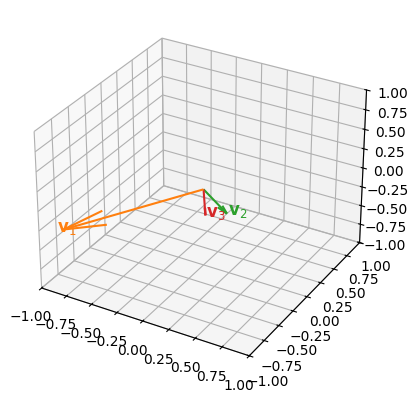

In [5]:
vecs_3d = np.array([v1_3d, v2_3d, v3_3d])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

for i, (vx, vy, vz) in enumerate(vecs_3d, start=1):
    ax.quiver(0, 0, 0, vx, vy, vz, length=1, normalize=False, color=f'C{i}')
    ax.text(vx * 1.05, vy * 1.05, vz * 1.05, f"$\\mathbf{{v}}_{i}$", 
            fontsize=12, color=f'C{i}')

plt.show()

# Pairwise Angles

In [6]:
df_vecs_2d_angles = pd.DataFrame(columns=['v1', 'v2', 'dot_product', 'norm1', 'norm2', 'angle_rad', 'angle_deg'])

for combo in itertools.combinations(enumerate(vecs_2d, start=1), 2):
    (i1, v1), (i2, v2) = combo
    dot_product = calc_dot_product(v1, v2)
    norm1 = calc_norm(v1)
    norm2 = calc_norm(v2)
    angle_rad = calc_angle(v1, v2)
    angle_deg = math.degrees(angle_rad)

    df_vecs_2d_angles.loc[len(df_vecs_2d_angles)] = [i1, i2, dot_product, norm1, norm2, angle_rad, angle_deg]

df_vecs_3d_angles = pd.DataFrame(columns=['v1', 'v2', 'dot_product', 'norm1', 'norm2', 'angle_rad', 'angle_deg'])

for combo in itertools.combinations(enumerate(vecs_3d, start=1), 2):
    (i1, v1), (i2, v2) = combo
    dot_product = calc_dot_product(v1, v2)
    norm1 = calc_norm(v1)
    norm2 = calc_norm(v2)
    angle_rad = calc_angle(v1, v2)
    angle_deg = math.degrees(angle_rad)

    df_vecs_3d_angles.loc[len(df_vecs_3d_angles)] = [i1, i2, dot_product, norm1, norm2, angle_rad, angle_deg]

print("2D Angles:\n", df_vecs_2d_angles)
print("\n\n")
print("3D Angles:\n", df_vecs_3d_angles)

2D Angles:
     v1   v2  dot_product     norm1     norm2  angle_rad  angle_deg
0  1.0  2.0     0.721223  0.776592  0.986036   0.342687   19.63452
1  1.0  3.0    -0.457069  0.776592  0.795761   2.403295  137.69867
2  2.0  3.0    -0.724044  0.986036  0.795761   2.745982  157.33319



3D Angles:
     v1   v2  dot_product     norm1     norm2  angle_rad   angle_deg
0  1.0  2.0    -0.142486  1.238481  0.333251   1.923282  110.195954
1  1.0  3.0     0.080451  1.238481  0.273922   1.331370   76.281865
2  2.0  3.0     0.075742  0.333251  0.273922   0.592166   33.928626


# Define and Validate Bases

In [7]:
def rand_invertible_matrix(dim=(2, 2)):
    while True:
        mat = 2 * np.random.rand(*dim) - 1
        if np.linalg.det(mat) != 0:
            return mat

def print_basis_info(matrix):
    print("Matrix:", matrix)
    print("Determinant:", np.linalg.det(matrix))
    print("Inverse:", np.linalg.inv(matrix))

base_2d = rand_invertible_matrix(dim=(2, 2))
base_3d = rand_invertible_matrix(dim=(3, 3))

secondary_2d = rand_invertible_matrix(dim=(2, 2))
secondary_3d = rand_invertible_matrix(dim=(3, 3))

print("Base 2D:")
print_basis_info(base_2d)
print("\n\n")
print("Secondary 2D:")
print_basis_info(secondary_2d)
print("\n\n")
print("Base 3D:")
print_basis_info(base_3d)
print("\n\n")
print("Secondary 3D:")
print_basis_info(secondary_3d)

Base 2D:
Matrix: [[-0.57448397 -0.82011919]
 [ 0.5926171   0.27194505]]
Determinant: 0.3297885821111603
Inverse: [[ 0.82460419  2.48680285]
 [-1.79696063 -1.74197652]]



Secondary 2D:
Matrix: [[-0.44267906  0.30515359]
 [-0.63701608 -0.00694819]]
Determinant: 0.1974635630275988
Inverse: [[-0.03518721 -1.54536659]
 [ 3.22599302 -2.24182656]]



Base 3D:
Matrix: [[-0.10261124 -0.3243434   0.44541873]
 [-0.28894978  0.338559   -0.08748258]
 [-0.04266783  0.30526094 -0.8744935 ]]
Determinant: 0.07553171268016112
Inverse: [[-3.56621907 -1.95503656 -1.62085725]
 [-3.29599328  1.43963252 -1.82281503]
 [-0.97653688  0.5979241  -1.7007282 ]]



Secondary 3D:
Matrix: [[-0.64820234 -0.84368327 -0.76455653]
 [ 0.31829418  0.67361438 -0.46151599]
 [-0.73436581 -0.67241256 -0.9957679 ]]
Determinant: -0.1319749633205911
Inverse: [[ 7.43393063  2.47028144 -6.85273607]
 [-4.96964479 -0.63644581  4.1107012 ]
 [-2.12657273 -1.39202726  1.27371841]]


# Calculate Coordinates in Basis

In [8]:
v_std = vecs_2d[0]
B = base_2d

v_basis = np.linalg.inv(B) @ v_std
v_reconstructed = B @ v_basis

print(f"Original: {v_std}")
print(f"Basis coords: {v_basis}")
print(f"Reconstructed: {v_reconstructed}")
print(f"Are equal? {np.allclose(v_std, v_reconstructed)}")

Original: [ 0.15126282 -0.76171808]
Basis coords: [-1.76951074  1.05508169]
Reconstructed: [ 0.15126282 -0.76171808]
Are equal? True


# Change of Basis

In [9]:
v_std = vecs_2d[0]  # Original vector
B = base_2d        # First basis
C = secondary_2d   # Second basis

v_B = np.linalg.inv(B) @ v_std
v_C = np.linalg.inv(C) @ B @ v_B

v_std_from_B = B @ v_B
v_std_from_C = C @ v_C

print(f"Original v_std: {v_std}")
print(f"Coordinates in B: {v_B}")
print(f"Coordinates in C: {v_C}")
print(f"v_std from B: {v_std_from_B}")
print(f"v_std from C: {v_std_from_C}")
print(f"Both equal original? {np.allclose(v_std, v_std_from_B) and np.allclose(v_std, v_std_from_C)}")

Original v_std: [ 0.15126282 -0.76171808]
Coordinates in B: [-1.76951074  1.05508169]
Coordinates in C: [1.17181115 2.19561261]
v_std from B: [ 0.15126282 -0.76171808]
v_std from C: [ 0.15126282 -0.76171808]
Both equal original? True
